<CENTER><img src="images/ATLASOD.gif" style="width:50%"></CENTER>

# How to rediscover the Z boson yourself!
This notebook uses ATLAS Open Data http://opendata.atlas.cern to show you the steps to rediscover the Z boson yourself!

The idea is that you run this notebook as-is, then go through the tasks at the bottom to improve your study of the Z boson.

The datasets used in this notebook have already been filtered to include exactly 2 leptons per event, so that processing is quicker.

Feynman diagram pictures are borrowed from our friends at https://www.particlezoo.net

<CENTER><img src="images/Zee_feynman.png" style="width:50%"></CENTER>

## First time setup on your computer (no need on a web browser)
This first cell only needs to be run the first time you open this notebook on your computer. 

If you close Jupyter and re-open on the same computer, you won't need to run this first cell again.

If you open on binder, you don't need to run this cell.

In [ ]:
import sys
!{sys.executable} -m pip install --upgrade --user pip
!{sys.executable} -m pip install -U numpy pandas uproot matplotlib --user

## To setup everytime
Cell -> Run All Below

to be done every time you re-open this notebook

In [1]:
import uproot # for reading .root files
import pandas as pd # to store data as dataframe
import time # to measure time to analyse
import math # for mathematical functions such as square root
import numpy as np # # for numerical calculations such as histogramming
import matplotlib.pyplot as plt # for plotting
from matplotlib.ticker import MultipleLocator # for axis ticks

<a id='fraction'></a>

General definitions for fraction of data used, where to access the input files.

In [2]:
fraction = 0.01 # reduce this is you want the code to run quicker
                                                                                                                                  
tuple_path = "Input/Data/exactly2lep." # local
#tuple_path = "http://opendata.atlas.cern/release/samples/Data/" # web address

<a id='samples'></a>

samples to process

In [3]:
samples_list = ['DataEgamma'] # di-electron pairs only
#samples_list = ['DataEgamma','DataMuons'] # also available if you want to add data for di-muon pairs

Define function to get data from files

In [4]:
def get_data_from_files():
    
    frames = [] # define empty list to hold data
    for val in samples_list: # loop over each file
        fileString = tuple_path+val+".root" # file name to open
        temp = read_file(fileString,val) # call the function read_file defined below
        frames.append(temp) # append dataframe returned from read_file to list of dataframes
        data_frame = pd.concat(frames) # concatenate list of dataframes together into one dataframe
    
    return data_frame # return single dataframe

Define function to calculate diphoton invariant mass

In [5]:
def calc_mll(lep_pt,lep_eta,lep_phi):
    # first lepton is [0], 2nd lepton is [1] etc
    
    px_0 = lep_pt[0]*math.cos(lep_phi[0]) # x-component of lepton[0] momentum
    py_0 = lep_pt[0]*math.sin(lep_phi[0]) # y-component of lepton[0] momentum
    pz_0 = lep_pt[0]*math.sinh(lep_eta[0]) # z-component of lepton[0] momentum
    px_1 = lep_pt[1]*math.cos(lep_phi[1]) # x-component of lepton[1] momentum
    py_1 = lep_pt[1]*math.sin(lep_phi[1]) # y-component of lepton[1] momentum
    pz_1 = lep_pt[1]*math.sinh(lep_eta[1]) # z-component of lepton[1] momentum
    sumpx = px_0 + px_1 # x-component of di-lepton momentum
    sumpy = py_0 + py_1 # y-component of di-lepton momentum
    sumpz = pz_0 + pz_1 # z-component of di-lepton momentum
    sump = math.sqrt(sumpx**2 + sumpy**2 + sumpz**2) # magnitude of di-lepton momentum
    
    # we can use momentum components to calculate energy since p >> m
    E_0 = math.sqrt(px_0**2 + py_0**2 + pz_0**2) # lepton[0] energy
    E_1 = math.sqrt(px_1**2 + py_1**2 + pz_1**2) # lepton[1] energy
    sumE = E_0 + E_1 # di-lepton energy
    
    return math.sqrt(sumE**2 - sump**2)/1000 #/1000 to go from MeV to GeV

<a id='changing_cut'></a>

## Changing a cut
If you change a cut: Cell -> Run All Below

If you change a cut here, you also need to uncomment the corresponding cut in the cell below.

In [6]:
# cut on number of leptons
def cut_n_lep(lep_n):
    # want to keep events where there are 2 leptons
    return lep_n == 2

# cut on lepton charge
def cut_lep_charge(lep_charge):
    # want to keep events when sum of lepton charges is equal 0
    # first lepton is [0], 2nd lepton is [1]
    return # which events to return is for you to fill in

# cut on lepton type
def cut_lep_type(lep_type):
    # want to keep events with either 2 electron types or 2 muon types
    return # which events to return is for you to fill in

# cut on lepton pt
def cut_lep_pt(lep_pt):
    # want to keep events where the leptons have lep_pt[] > 25000 MeV 
    return # which events to return is for you to fill in

<a id='applying_cut'></a>

## Applying a cut
If you add a cut: Cell -> Run All Below

If you apply a cut here, it also needs to be defined in the cell above.

In [7]:
def read_file(path,sample):
    start = time.time() # start the clock
    print("\tProcessing: "+sample) # print which sample is being processed
    data_all = pd.DataFrame() # define empty pandas DataFrame to hold all data for this sample
    tree = uproot.open(path)["mini"] # open the tree called mini
    numevents = uproot.numentries(path, "mini") # number of events
    for data in tree.iterate(["lep_n","lep_pt","lep_eta","lep_phi",
                              'lep_E',"lep_charge","lep_type", 
                              # add more variables here if you make cuts on them
                             ], entrysteps=2500000, # number of events in a batch to process
                             outputtype=pd.DataFrame, # choose output type as pandas DataFrame
                             entrystop=numevents*fraction): # process up to numevents*fraction

        nIn = len(data.index) # number of events in this batch

        # cut on number of leptons
        data = data[ np.vectorize(cut_n_lep)(data.lep_n) ]

        # dataframe contents can be printed at any stage like this
        #print(data)

        # dataframe column can be printed at any stage like this
        #print(data['lep_charge'])

        # dataframe columns can be printed at any stage like this
        #print(data[['lep_charge','lep_type']])

        # cut on lepton charge
        #data = data[ np.vectorize(cut_lep_charge)(data.lep_charge) ]

        # cut on lepton type
        #data = data[ np.vectorize(cut_lep_type)(data.lep_type) ]

        # cut on lepton pt
        #data = data[ np.vectorize(cut_lep_pt)(data.lep_pt) ]

        # calculation of 2-lepton invariant mass
        data['mll'] = np.vectorize(calc_mll)(data.lep_pt,data.lep_eta,
                                             data.lep_phi)

        nOut = len(data.index) # number of events passing cuts in this batch
        data_all = data_all.append(data) # append dataframe from this batch to the dataframe for the whole sample
        elapsed = time.time() - start # time taken to process
        print("\t\tTime taken: "+str(elapsed)+", nIn: "+str(nIn)+", nOut: "+str(nOut)) # events before and after

    return data_all # return dataframe containing events passing all cuts

This is where the processing happens

In [8]:
start = time.time()
data_frame = get_data_from_files()
elapsed = time.time() - start
print("Time taken: "+str(elapsed))

	Processing: DataEgamma
		Time taken: 0.7316741943359375, nIn: 4293, nOut: 4293
Time taken: 0.7366559505462646


## Make a change to plotting
If you only want a make a change in the plot: Cell -> Run All Below

In [9]:
def plot_data(data):
    
    xmin = 0
    xmax = 220
    step_size = 5
    
    bins = np.arange(start=xmin, # The interval includes this value
                     stop=xmax+step_size, # The interval doesn't include this value
                     step=step_size ) # Spacing between values
    bin_centres = np.arange(start=xmin+step_size/2, # The interval includes this value
                            stop=xmax+step_size/2, # The interval doesn't include this value
                            step=step_size ) # Spacing between values

    data_mll,_ = np.histogram( data_frame['mll'].values, bins=bins ) # histogram the data
    data_mll_errors = np.sqrt( data_mll ) # statistical error on the data

    plt.errorbar(x=bin_centres, y=data_mll, yerr=data_mll_errors, 
                 fmt='ko' ) # plot format

    plt.ylabel( 'Events', horizontalalignment='right', y=1 ) # write y-axis label
    plt.yscale( 'log' ) # log scale on y-axis

    plt.xlabel('Di-lepton invariant mass $m_{\ell\ell}$ [GeV]', # x-axis label
               horizontalalignment='right', x=1 )
    plt.xlim( left=bins[0], right=bins[-1] ) # no margin on x-axis
    plt.gca().xaxis.set_major_locator( MultipleLocator(20) ) # separation of x-axis major ticks
    plt.gca().xaxis.set_minor_locator( MultipleLocator(5) ) # separation of x-axis minor ticks
    
    plt.tick_params(which='both', # ticks on both x and y axes
                    direction='in', # Put ticks inside and outside the axes
                    top=True, # draw ticks on the top axis
                    right=True ) # draw ticks on right axis
    
    return

Call the function to plot the data

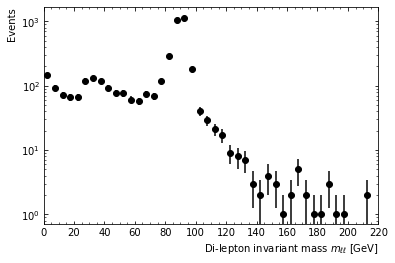

In [11]:
plot_data(data_frame)

## Your tasks

* Discuss any difference when you increase the fraction [here](#fraction)
* Discuss any difference when you use DataMuons rather than DataEgamma [here](#samples)
* Discuss any difference when you use DataMuons and DataEgamma [here](#samples)
* Discuss any difference when you uncomment the cut on lepton charge in line 10 of '[Changing a cut](#changing_cut)' and line 29 of '[Applying a cut](#applying_cut)'
* Discuss any difference when you uncomment the cut on lepton type in line 15 of '[Changing a cut](#changing_cut)' and line 32 of '[Applying a cut](#applying_cut)'
* Discuss any difference when you uncomment the cut on lepton pt in line 20 of '[Changing a cut](#changing_cut)' and line 35 of '[Applying a cut](#applying_cut)'